<a href="https://colab.research.google.com/github/Christina-26/Marvel-Level--2-Task/blob/main/Hyper_parameter_tuning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Hyperparameter Tuning**
Hyperparameter tuning is the process of selecting the optimal values for a machine learning model’s hyperparameters. Hyperparameters are settings that control the learning process of the model, such as the learning rate, the number of neurons in a neural network, or the kernel size in a support vector machine. The goal of hyperparameter tuning is to find the values that lead to the best performance on a given task.
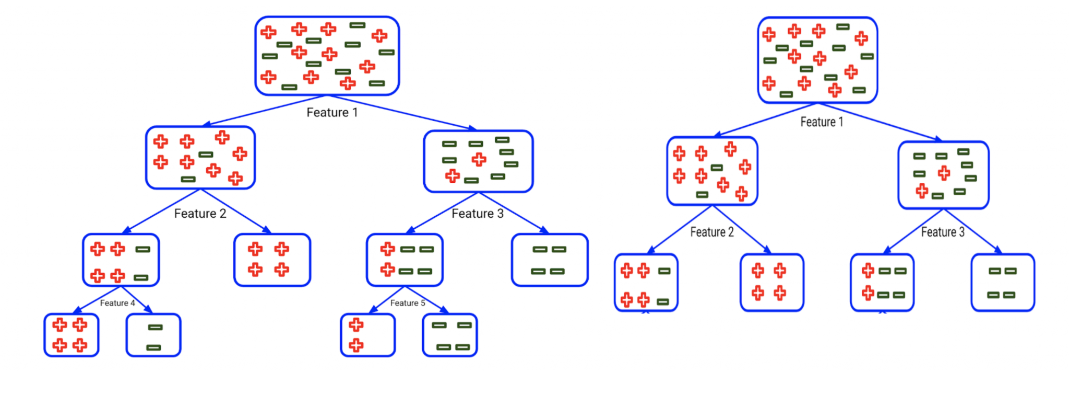

In [ ]:
from sklearn.datasets import make_classification

X, Y = make_classification(n_samples=200, n_classes=2, n_features=10, n_redundant=0, random_state=1)

In [ ]:
X.shape, Y.shape

((200, 10), (200,))

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)

In [ ]:
X_train.shape, Y_train.shape

((160, 10), (160,))

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

rf = RandomForestClassifier(max_features=5, n_estimators=100)

In [ ]:
rf.fit(X_train, Y_train)

RandomForestClassifier(max_features=5)

In [ ]:
rf.score(X_test, Y_test)

0.9

In [ ]:
rf.score(X_test, Y_test)

Y_pred = rf.predict(X_test)
accuracy_score(Y_pred, Y_test)

0.9

In [ ]:
Y_pred, Y_test

(array([1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1,
        1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1]),
 array([1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1,
        1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1]))

In [ ]:
from sklearn.model_selection import GridSearchCV
import numpy as np

max_features_range = np.arange(1,6,1)
n_estimators_range = np.arange(10,210,10)
param_grid = dict(max_features=max_features_range, n_estimators=n_estimators_range)

rf = RandomForestClassifier()

grid = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5)

In [ ]:
grid.fit(X_train, Y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_features': array([1, 2, 3, 4, 5]),
                         'n_estimators': array([ 10,  20,  30,  40,  50,  60,  70,  80,  90, 100, 110, 120, 130,
       140, 150, 160, 170, 180, 190, 200])})

In [ ]:
print("The best parameters are %s with a score of %0.2f"
      % (grid.best_params_, grid.best_score_))

The best parameters are {'max_features': 4, 'n_estimators': 110} with a score of 0.91


In [ ]:
import pandas as pd

grid_results = pd.concat([pd.DataFrame(grid.cv_results_["params"]),pd.DataFrame(grid.cv_results_["mean_test_score"], columns=["Accuracy"])],axis=1)
grid_results.head()

,max_features,n_estimators,Accuracy
0,1,10,0.77500
1,1,20,0.81250
2,1,30,0.85625
3,1,40,0.84375
4,1,50,0.85000


In [ ]:
grid_contour = grid_results.groupby(['max_features','n_estimators']).mean()
grid_contour

Accuracy
max_features n_estimators          
1            10             0.77500
             20             0.81250
             30             0.85625
             40             0.84375
             50             0.85000
...                             ...
5            160            0.88750
             170            0.88750
             180            0.87500
             190            0.89375
             200            0.86875

[100 rows x 1 columns]

In [ ]:
grid_reset = grid_contour.reset_index()
grid_reset.columns = ['max_features', 'n_estimators', 'Accuracy']
grid_pivot = grid_reset.pivot('max_features', 'n_estimators')
grid_pivot

<ipython-input-21-f7cd6ee824b7>:3: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  grid_pivot = grid_reset.pivot('max_features', 'n_estimators')


Accuracy                                                        \
n_estimators      10       20       30       40       50       60       70    
max_features                                                                  
1              0.7750  0.81250  0.85625  0.84375  0.85000  0.83125  0.85625   
2              0.8500  0.85000  0.85625  0.86250  0.86875  0.86875  0.88125   
3              0.8250  0.87500  0.86250  0.88125  0.86875  0.87500  0.87500   
4              0.8750  0.89375  0.88125  0.87500  0.88750  0.88125  0.87500   
5              0.8375  0.86250  0.87500  0.88125  0.88750  0.88125  0.89375   

                                                                            \
n_estimators      80       90       100      110      120     130      140   
max_features                                                                 
1             0.82500  0.83125  0.88125  0.85000  0.84375  0.8375  0.87500   
2             0.85625  0.88125  0.87500  0.88750  0.86875  0.8750  0.85625   
3             0.88750  0.87500  0.86875  0.89375  0.88125  0.8750  0.86250   
4             0.87500  0.88125  0.87500  0.90625  0.87500  0.8875  0.86875   
5             0.87500  0.88125  0.90000  0.89375  0.88750  0.8875  0.88125   

                                                                    
n_estimators      150      160      170      180      190      200  
max_features                                                        
1             0.83750  0.86875  0.86250  0.86875  0.90000  0.86875  
2             0.87500  0.86875  0.86875  0.86250  0.87500  0.86875  
3             0.86250  0.87500  0.87500  0.86250  0.88125  0.86250  
4             0.88125  0.88125  0.88125  0.88125  0.89375  0.88125  
5             0.88750  0.88750  0.88750  0.87500  0.89375  0.86875

In [ ]:

grid_reset = grid_contour.reset_index()
grid_reset.columns = ['max_features', 'n_estimators', 'Accuracy']
grid_pivot = grid_reset.pivot('max_features', 'n_estimators')
grid_pivot

<ipython-input-22-f7cd6ee824b7>:3: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  grid_pivot = grid_reset.pivot('max_features', 'n_estimators')


Accuracy                                                        \
n_estimators      10       20       30       40       50       60       70    
max_features                                                                  
1              0.7750  0.81250  0.85625  0.84375  0.85000  0.83125  0.85625   
2              0.8500  0.85000  0.85625  0.86250  0.86875  0.86875  0.88125   
3              0.8250  0.87500  0.86250  0.88125  0.86875  0.87500  0.87500   
4              0.8750  0.89375  0.88125  0.87500  0.88750  0.88125  0.87500   
5              0.8375  0.86250  0.87500  0.88125  0.88750  0.88125  0.89375   

                                                                            \
n_estimators      80       90       100      110      120     130      140   
max_features                                                                 
1             0.82500  0.83125  0.88125  0.85000  0.84375  0.8375  0.87500   
2             0.85625  0.88125  0.87500  0.88750  0.86875  0.8750  0.85625   
3             0.88750  0.87500  0.86875  0.89375  0.88125  0.8750  0.86250   
4             0.87500  0.88125  0.87500  0.90625  0.87500  0.8875  0.86875   
5             0.87500  0.88125  0.90000  0.89375  0.88750  0.8875  0.88125   

                                                                    
n_estimators      150      160      170      180      190      200  
max_features                                                        
1             0.83750  0.86875  0.86250  0.86875  0.90000  0.86875  
2             0.87500  0.86875  0.86875  0.86250  0.87500  0.86875  
3             0.86250  0.87500  0.87500  0.86250  0.88125  0.86250  
4             0.88125  0.88125  0.88125  0.88125  0.89375  0.88125  
5             0.88750  0.88750  0.88750  0.87500  0.89375  0.86875

In [ ]:
x = grid_pivot.columns.levels[1].values
y = grid_pivot.index.values
z = grid_pivot.values

In [ ]:
import plotly.graph_objects as go

# X and Y axes labels
layout = go.Layout(
            xaxis=go.layout.XAxis(
              title=go.layout.xaxis.Title(
              text='n_estimators')
             ),
             yaxis=go.layout.YAxis(
              title=go.layout.yaxis.Title(
              text='max_features')
            ) )

fig = go.Figure(data = [go.Contour(z=z, x=x, y=y)], layout=layout )

fig.update_layout(title='Hyperparameter tuning', autosize=False,
                  width=500, height=500,
                  margin=dict(l=65, r=50, b=65, t=90))

fig.show()

In [ ]:
import plotly.graph_objects as go


fig = go.Figure(data= [go.Surface(z=z, y=y, x=x)], layout=layout )
fig.update_layout(title='Hyperparameter tuning',
                  scene = dict(
                    xaxis_title='n_estimators',
                    yaxis_title='max_features',
                    zaxis_title='Accuracy'),
                  autosize=False,
                  width=800, height=800,
                  margin=dict(l=65, r=50, b=65, t=90))
fig.show()